In [1]:
import pandas as pd 
import numpy as np
import math

from numpy.random import uniform
from scipy.stats import kstest, t, norm
import matplotlib.pyplot as plt
from matplotlib import mlab
import pylab

# Задание 1.1
Задана плотность распределения вероятностей некоторой случайной величины:
𝑓(𝑥) = 1/4𝜋(2 + cos 𝑥)𝐼(0 ≤ 𝑥 ≤ 2𝜋),
 где 𝐼(𝑥 ∈ 𝐴) = 1, если 𝑥 ∈ 𝐴 и нуль иначе. Сгенерировать выборку из данного распределения. На основе сгенерированной выборки проверить гипотезу согласия с заданным распределением.

In [2]:

# Размер выборки
N = 10000

# Границы интервала
A = 0
B = 2 * np.pi

# Сгенерированная выборка
sample = []
samplex = []

In [3]:
# Функция плотности распределения вероятности
def fun(x):
    return (2 + np.cos(x)) / (4 * np.pi) * ((A <= x) * (x <= B))

# Интеграл функции плотности распределения вероятности
def F(x):
    return (2 * x + np.sin(x)) / (4 * np.pi) * ((A <= x) * (x <= B))

In [4]:
# максимальное значение функции плотности распределения
M = 3 / 4 / np.pi
# Метод Неймана
while len(sample) < N:
    x1 = A + (B - A) * uniform()
    x2 = M * uniform()
    if x2 <= fun(x1):
        sample.append(x1)

In [5]:
print(sample)

[0.056843986869602195, 4.513218004465002, 4.406846878002124, 5.655556896582838, 6.177324337599154, 3.015530257625254, 0.016891449216364787, 5.677126664505249, 0.7346216748672633, 0.11746452257700557, 5.706239012093208, 1.3402395257271043, 1.2369109767788824, 4.561983014622723, 1.877150506836244, 3.3464380882547355, 6.049369334326889, 4.854030837531129, 4.656221002299977, 5.797049024965081, 5.039583051650866, 4.605193859492699, 1.6176083994571429, 0.5608305932407258, 0.5054326672980853, 5.577880134491776, 0.19359537208505265, 0.9905505557077846, 0.9313190690394028, 5.256970838496032, 6.119941370639557, 5.392054551813988, 3.887716639054128, 5.900605001382324, 5.783266433478681, 1.5064855543211493, 5.2939898018923435, 5.919455349825318, 0.7497063664950946, 5.055900223691344, 4.207306438357628, 1.909657598612694, 4.771395007756701, 0.7513112833300414, 5.805147291779579, 5.77226992902519, 5.779132759192847, 1.9975435876857728, 6.150311114738934, 6.195400584527496, 1.352590652547128, 4.58487

In [6]:
# Проверка согласия с заданным распределением
print (kstest(sample, F))


KstestResult(statistic=0.00912118583399113, pvalue=0.3762172012534682)


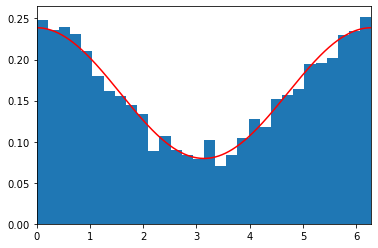

In [7]:
# Параметры графика плотности
x = np.linspace(A,B,1000)
y = fun(x)
# Гистограмма статистических данных
mytry = plt.hist(sample,bins = 30,density = True)
# График плотности
mycurve = plt.plot(x,y,color = "red")
plt.xlim(A,B)
plt.show()

# Задание 1.2
Пусть случайный вектор 𝑋 = (𝑋1, ..., 𝑋𝑛) имеет многомерное нормальное
распределение N(𝜇, Σ) (вектор средних 𝜇 и матрица ковариаций Σ заданы).
На основе сгенерированной выборки найти оценку матрицы ковариаций
и проверить гипотезу о равенстве коэффициента корреляции 𝐶𝑜𝑟(𝑋𝑖
, 𝑋𝑗 )
(для фиксированных индексов 𝑖, 𝑗 = 1, ..., 𝑛) требуемому значению

In [8]:
# Задание 1.2
# Размер выборки
N = 10000
# Количество средних
M = 8
# Исходный вектор средних
mean = []
for i in range(M):
    mean.append(np.random.uniform(0,20))
print(mean)
#  Генерация исходной матрицы ковариации
B =  np.array(np.zeros((M,M)))
for i in range(0,8):
    for j in range(0,i+1):
        B[i][j] = np.random.uniform(0,5);
cov  = B.dot(B.transpose());
#print(B);
#print('\n');
#print(B.transpose());
#print('\n');
print(cov);

[14.80410431433285, 11.439680504420977, 3.6017372281891635, 13.948296416449788, 19.731378707219598, 8.509053339277502, 8.095830852330188, 6.96683233055877]
[[12.81290199  8.44302838  3.80148016 15.72348671  3.2650826   4.04817562
   3.06735454  8.77550722]
 [ 8.44302838  7.77949702  8.4032103  10.9156182   9.42573217  4.62235161
   5.36353105  6.70681589]
 [ 3.80148016  8.4032103  26.11231775 11.36541811 35.49739606 10.67996374
  20.64141716  8.64566168]
 [15.72348671 10.9156182  11.36541811 25.19422937 18.80890053 10.16875857
  10.99125818 15.32283531]
 [ 3.2650826   9.42573217 35.49739606 18.80890053 62.07591477 25.97690514
  32.31486137 20.37293168]
 [ 4.04817562  4.62235161 10.67996374 10.16875857 25.97690514 25.97257574
  18.58453676 21.40898822]
 [ 3.06735454  5.36353105 20.64141716 10.99125818 32.31486137 18.58453676
  28.34745833 15.99394282]
 [ 8.77550722  6.70681589  8.64566168 15.32283531 20.37293168 21.40898822
  15.99394282 21.11524748]]


In [9]:
# Генерация случайного вектора c многомерным нормальным распределением
vec =  np.random.multivariate_normal(mean, cov, N)

# Матрица ковариаций (эмпирическая)
new_cov = np.cov(vec.T)

print(cov)
print('\n');
print(new_cov)


[[12.81290199  8.44302838  3.80148016 15.72348671  3.2650826   4.04817562
   3.06735454  8.77550722]
 [ 8.44302838  7.77949702  8.4032103  10.9156182   9.42573217  4.62235161
   5.36353105  6.70681589]
 [ 3.80148016  8.4032103  26.11231775 11.36541811 35.49739606 10.67996374
  20.64141716  8.64566168]
 [15.72348671 10.9156182  11.36541811 25.19422937 18.80890053 10.16875857
  10.99125818 15.32283531]
 [ 3.2650826   9.42573217 35.49739606 18.80890053 62.07591477 25.97690514
  32.31486137 20.37293168]
 [ 4.04817562  4.62235161 10.67996374 10.16875857 25.97690514 25.97257574
  18.58453676 21.40898822]
 [ 3.06735454  5.36353105 20.64141716 10.99125818 32.31486137 18.58453676
  28.34745833 15.99394282]
 [ 8.77550722  6.70681589  8.64566168 15.32283531 20.37293168 21.40898822
  15.99394282 21.11524748]]


[[12.67177529  8.38454243  3.9379297  15.66427766  3.51218963  4.02245324
   3.29193286  8.73242631]
 [ 8.38454243  7.78058193  8.53610425 10.91533403  9.63060021  4.60965452
   5.58313807 

In [10]:
# Преобразование фишера
def check(i, j):
    r = cov[i][j] / np.sqrt(cov[i][i] * cov[j][j])
    q = new_cov[i][j] / np.sqrt(new_cov[i][i] * new_cov[j][j])
    z_r = np.log( (1 + r) / (1 - r) ) / 2
    z_q = np.log( (1 + q) / (1 - q) ) / 2
    t = (z_q - z_r) / np.sqrt(1 / (N - 3))
    return t


In [11]:
#Проверяем гипотезу о равенстве коэфицентов i= 0,j= 1;
x = 0
y = 1
#z - значение статистики
t = check(x, y)
# 
stat = norm.ppf(1-0.05)
print(t)
print(stat)
if abs(t) < stat:
    print("Гипотеза p = {} принимается".format(new_cov[x][y]))
else:
    print("Гипотеза p = {} отклоняется".format(new_cov[x][y]))
#P - уровень при проверке правосторонней альтернативы
print("p-value: ", 2 * (1 - norm.cdf(abs(t))))
#P - уровень при проверке левосторонней альтернативы
print("p-value: ", 2 * (norm.cdf(-abs(t))))


-0.4383123135874825
1.6448536269514722
Гипотеза p = 8.384542429852875 принимается
p-value:  0.6611599009379996
p-value:  0.6611599009379996


# Задание 2
В области 𝐴, представляющей собой бесконечный слой (на плоскости) вакуума
толщиной 𝐷 м, было одновременно испущено 𝑁 +1 фотонов, где 𝑁 – случайная
величина, имеющая распределение Пуассона с параметром 𝜆 = 2. Предполагается, что точки излучения расположены на одной прямой и их распределение
по толщине 𝐷 случайное и равномерное, а распределение направлений излучения фотонов – изотропное. С каждой из двух сторон расположен детектор в
виде бесконечной полосы. При попадании в детектор фотон поглощается. Детекторы включены в схему совпадений, которая срабатывает в том случае, если
промежуток времени между попаданиями фотонов в детекторы не превышает
∆𝑡 = 3·10−8
с. Скорость света в вакууме 𝐶 = 3·108 м/с. Вычислить вероятность
того, что схема сработала.

In [12]:
#Задание 2
#Толщина
D = 300
#скорость света в вакууме
C = 300000000
#максимальный промежуток попадания фотонов на детектор
deltaT = 3e-8
#Количество тестов
Ntests = 500
res = []

In [13]:
 for  i in range(1,Ntests+1):
        res.append(0);
#Проводим Ntests тестов
for it in range(1,Ntests):
    #Генерируем количество фотонов
    N = np.random.poisson(lam=25); 
    N = N + 1
    if N > 1:
    #Генерируем распорожение точки вдоль толщины
        y = np.random.uniform( -D/2,  D/2,N)
    #Генерируем угол направления движения точки
        phi = np.random.uniform(0,2*np.pi,N)
        t = []; 
        for i in range(0,N):
            t.append(0);
    #Находим время достижения детектора
        for i in range(1,N):
            if phi[i] < np.pi :
                t[i] =  (D/2 - y[i]) / (C*np.sin(phi[i]))
            else:
                t[i] =  (y[i] - D/2) / (C*np.sin(phi[i]));
        t = np.sort(t)
    #print(t);
        k = 0
    #Находим пары,для которых срабатывает детектор
        for i in range(1,N-1):
            if t[i+1] - t[i] < deltaT :
                k = k + 1
    #Получаем вероятность срабатывания
        res[it] = (k/(N-1))
#Берем среднее от всех экспериментов
print(np.mean(res));

0.25986614757529386


# Задание 3
Реализовать алгоритм генерации точек, равномерно распределенных на поверхности геликоида:
𝑥 = 𝑢 cos 𝑣,
𝑦 = 𝑢 sin 𝑣,
𝑧 = 𝑣,
0 ≤ 𝑢, 𝑣 ≤ 2*pi

In [14]:
# 3 задание
#Площадь поверхности
C = 2*np.pi*np.pi * math.sqrt(4 * np.pi* np.pi+1)+ np.pi*np.log( 2*np.pi+math.sqrt(4*np.pi*np.pi+1))

In [15]:
#Вероятность попадания на поверхность
def f (u,v):
    return( math.sqrt(u*u + 1) / C )


In [16]:
#Радиус окружности
M = 0.06
#количество генерируемых точек
L = 10000
#Параметры 
U = [0]* L;
V= [0] * L;
i = 0

In [17]:
#Генерация координат точек
while (i < L) :
    u  = uniform(0,2*np.pi)
    v  = uniform(0,2*np.pi)
    r  = uniform(0, M)
    if( r <= f(u,v)):
        U[i]=u
        V[i]=v
        i = i+1

In [18]:
#Генерация декартовых координат точек
x = U 
y = U 
z = V
for i in range(0,len(x)):
    x[i]=U[i]*math.cos(V[i]);
    y[i]=U[i]*math.sin(V[i]);

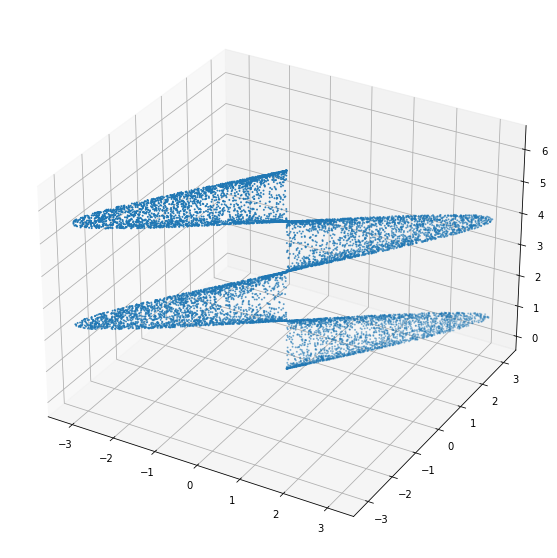

In [19]:
#Построение графика распределения точек на геликоиде
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")
ax.scatter3D(x, y, z,s=1);
plt.show()

# Задание 4
Пусть имеется 𝑛 + 𝑚 клеток некоторой ткани. При этом клетки 1, ..., 𝑛 являются злокачественными, а клетки 𝑛 + 1, ..., 𝑛 + 𝑚 – здоровыми. В результате
проведения терапии клетка 𝑖 = 1, ..., 𝑛+𝑚 погибает через время 𝑇𝑖
, имеющее показательное распределение с параметром 𝜆𝑖
. Случайные величины 𝑇_1, ..., 𝑇_𝑛+𝑚
предполагаются независимыми. Пусть в некоторый момент времени все злокачественные клетки погибли, требуется вычислить оценку вероятности того, что
число оставшихся здоровых клеток 𝑁 превысит некоторое заданное значение
𝑘:P (𝑁 ≥ 𝑘) = P(︂max 𝑖≤𝑛 𝑇_𝑖 < 𝑇(𝑘))︂,где 𝑇 (𝑘) – 𝑘-ая по величине из значений 𝑇_𝑛+1, ..., 𝑇_𝑛+𝑚, 

In [20]:
# 4 задание
#Число злокачественных клеток
N = 100;
#Число здоровых клеток
M = 200;
k = 10;
#параметр для распределения времени жизни здоровых клеток
lmbd = 1
#параметр для распределения времени жизни больных клеток
mu = 2;
tN = [];
tM = [];
#генерация времен жизни клеток
for i in range(0,N):
    tN.append(np.random.exponential(mu));
for i in range(0,M):
    tM.append(np.random.exponential(lmbd));
tN = np.sort(tN)
tM = np.sort(tM);
#Находим k-ю здоровую клетку
tk = tM[M - k];
print(tk);

2.791044459902203


Придумать какие комментари  здесь написать

In [21]:
F = 1 - np.exp(-mu*tk);
print(-mu*tk)
print(F);
ans = 1;
for i in range(0,N):
    ans*=F;
print(ans);

-5.582088919804406
0.9962353068428047
0.6857927949631226


# Задание 5
Рассматриваются случайные блуждания без самопересечений (SAW - Self-Avoiding
Walk) на неограниченной двумерной целочисленной решетке, стартующие с начала координат (см. рис. 1). Найти оценку среднего расстояния от начала координат финальной точки блуждания заданной длины 𝑛 с помощью метода
существенной выборки

In [22]:
# 5 задание
# Длина блужданий
M = 10
# Число экспериментов
N = 1000
#Вектора перемещений
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]


In [23]:
#Функция нахождения расстояния от точки (x,y) до (0,0)
def find_s(x,y):
    return math.sqrt(x*x+y*y)

In [24]:
# Число потенциально возможных передвижений за сессию
w = []
ss = []
p = []
for i in range(N):
     # Число вариантов движения в шаге
    dts = []
    # Стартовая позиция
    person = [0, 0]
    # Массив посещённых
    visited = []
    for t in range(0,M):
        # Добавляем текущую клетку в посещённые
        visited.append(person)
        
        # Смотрим соседние клетки
        neighbors = []
        for i in range(4):
            neighbors.append([person[0] + dx[i], person[1] + dy[i]])

        # Выделяем из них доступные
        free_neighbors = [i for i in neighbors if i not in visited]
        
        # Если можем куда-то переместиться 
        if len(free_neighbors) > 0:
            dts.append(len(free_neighbors))
            # Перемещаемся в случайную позицию из доступных
            person = free_neighbors[np.random.randint(0, len(free_neighbors))]
        else:
            break
    ss.append(find_s(person[0],person[1])*np.prod(dts));
    p.append(np.prod(dts))

In [25]:
ans = np.sum(ss)/np.sum(p);
print(ans);

4.875000733065617


# Задание 6
В пространстве расположен шар 𝑀 с центром в точке (𝑥0, 𝑦0, 𝑧0) и радиусом 𝑅.
Требуется с помощью методов Монте-Карло вычислить интеграл
∫︁𝐻2 𝑉 (𝜔) cos 𝜃𝑑𝜔,
где 𝐻2 – единичная полусфера с центром в начале координат; 𝜃 – угол между
направлением 𝜔 и осью 𝑧; 𝑉 (𝜔) – так называемая функция видимости:
𝑉 (𝜔) = {︃ 0, если прямая с направляющим вектором 𝜔 пересекает шар 𝑀,
         1, иначе.
При расчетах воспользоваться методом существенной выборки, взяв в качестве
вспомогательного распределения:
𝑞(𝜔) ∝ cos 𝜃.
Сравнить результаты со стандартным методом Монте-Карло (генерация равномерно распределенных точек на полусфере) в терминах дисперсии оценок.

In [26]:
# Центр
coords = [1, 2, 3]

# Радиус
R = 1.0

# число точек
N = 100

In [27]:
# Генерация точек на сфере существенной выборки
def gen_points_s(samples=1):
    points = []
    for i in range(samples):
        u = np.random.rand()
        theta = 0.5 * np.arccos(1 - 2 * u)
        fi = np.random.rand() * 2 * np.pi
        x = np.sin(theta) * np.cos(fi)
        y = np.sin(theta) * np.sin(fi)
        z = np.cos(theta)
        points.append([x, y, z, theta])

    return np.array(points)


In [28]:
# Результат функции V s
res = []
means_res = []

points_s = gen_points_s(N)

In [29]:
for w in points_s:
    cos = np.cos(w[3])
    
    # Длина касательной к окружности из начала координат
    y = coords[0] ** 2 + coords[1] ** 2 + coords[2] ** 2 - R ** 2
    y = np.sqrt(y)

    # Текущая длина вектора
    z = w[0] ** 2 + w[1] ** 2 + w[2] ** 2
    z = np.sqrt(z)

    # Приводим к длине касательной к окружности
    w = w * y / z
    if (w[0] - coords[0]) ** 2 + (w[1] - coords[1]) ** 2 + (w[2] - coords[2]) ** 2 <= R ** 2:
        res.append(1)
    else:
        res.append(0)
    means_res.append(np.mean(res))

In [30]:
# Генерация точек на сфере монте-карло
def gen_points_mc(samples=1):
    points = []
    for i in range(samples):
        u = np.random.rand()
        theta = np.arccos(1 - u)
        fi = np.random.rand() * 2 * np.pi
        x = np.sin(theta) * np.cos(fi)
        y = np.sin(theta) * np.sin(fi)
        z = np.cos(theta)
        points.append([x, y, z, theta])
        
    return np.array(points)


In [31]:
# Результат функции V mc
usual_mc = []
means_mc = []

points_mc = gen_points_mc(N)

In [32]:
for w in points_mc:
    cos = np.cos(w[3])

    # Длина касательной к окружности из начала координат
    y = coords[0] ** 2 + coords[1] ** 2 + coords[2] ** 2 - R ** 2
    y = np.sqrt(y)

    # Текущая длина вектора
    z = w[0] ** 2 + w[1] ** 2 + w[2] ** 2
    z = np.sqrt(z)

    # Приводим к длине касательной к окружности
    w = w * y / z
    if (w[0] - coords[0]) ** 2 + (w[1] - coords[1]) ** 2 + (w[2] - coords[2]) ** 2 <= R ** 2:
        usual_mc.append(1 * cos)
    else:
        usual_mc.append(0)
    means_mc.append(np.mean(usual_mc))


In [33]:
print("Integral = {} Using usual mc: {}".format(np.mean(res) * np.pi, np.mean(usual_mc) * (2 *np.pi)))
print("Дисперсия оценок: {} MC: {}".format(np.std(means_res), np.std(means_mc)))

Integral = 0.15707963267948966 Using usual mc: 0.38622632070352014
Дисперсия оценок: 0.0190943614425252 MC: 0.023895160850238996
